# Proyecto para predecir la quiebra de una empresa




ML_prevision_de_quiebra

El objetivo de este proyecto es predecir si una empresa está en riesgo de quiebra, utilizando datos financieros históricos. El objetivo es identificar los factores más influyentes y construir un modelo predictivo.

Dataset
Nombre: Polish Companies Bankruptcy Data
Tamaño: 6819 observaciones y 96 columnas
Variable objetivo: Bankrupt? (1 = empresa quebrada, 0 = no quebrada)

Cada fila representa una empresa y contiene 95 ratios financieros anónimos.

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [20]:
df = pd.read_csv('data.csv')

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [12]:

df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [22]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

In [23]:
# Crear y entrenar modelo
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Predicciones
y_pred = log_model.predict(X_test)

# Resultados
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión global:")
print(accuracy_score(y_test, y_pred))

Matriz de confusión:
[[1961   19]
 [  66    0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.96      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.96      0.95      2046


Precisión global:
0.958455522971652


Top 20 variables más importantes según Regresión Logística:
[' Allocation rate per person', ' Accounts Receivable Turnover', ' Average Collection Days', ' Fixed Assets to Assets', ' Revenue Per Share (Yuan ¥)', ' Quick Assets/Current Liability', ' Interest-bearing debt interest rate', ' Net Value Growth Rate', ' Total Asset Growth Rate', ' Cash/Current Liability', ' Inventory/Current Liability', ' Research and development expense rate', ' Inventory Turnover Rate (times)', ' Total debt/Total net worth', ' Operating Expense Rate', ' Total assets to GNP price', ' Cash Turnover Rate', ' Long-term Liability to Current Assets', ' Current Asset Turnover Rate', ' Fixed Assets Turnover Frequency']


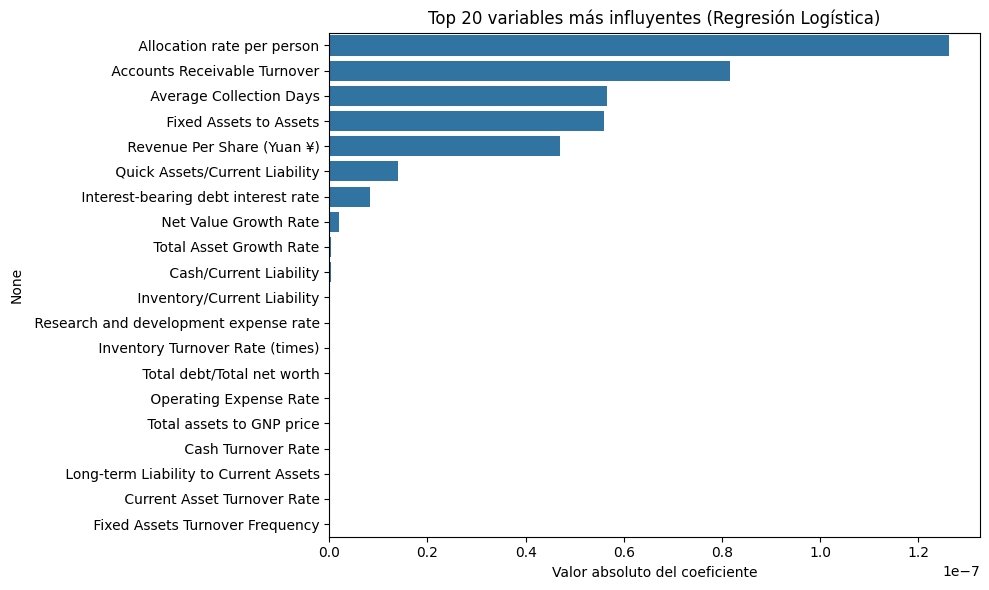

In [28]:
# Coeficientes del modelo
coef = pd.Series(log_model.coef_[0], index=X.columns)
top_features = coef.abs().sort_values(ascending=False).head(20)



# 3. Lista con los nombres de las 20 variables más influyentes
top20_logistic_features = list(top_features.index)
print("Top 20 variables más importantes según Regresión Logística:")
print(top20_logistic_features)

 #4. Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 variables más influyentes (Regresión Logística)")
plt.xlabel("Valor absoluto del coeficiente")
plt.tight_layout()
plt.show()



In [27]:
print("Top 20 variables más importantes según Regresión Logística:")
print(top20_logistic_features)

Top 20 variables más importantes según Regresión Logística:
[' Allocation rate per person', ' Accounts Receivable Turnover', ' Average Collection Days', ' Fixed Assets to Assets', ' Revenue Per Share (Yuan ¥)', ' Quick Assets/Current Liability', ' Interest-bearing debt interest rate', ' Net Value Growth Rate', ' Total Asset Growth Rate', ' Cash/Current Liability', ' Inventory/Current Liability', ' Research and development expense rate', ' Inventory Turnover Rate (times)', ' Total debt/Total net worth', ' Operating Expense Rate', ' Total assets to GNP price', ' Cash Turnover Rate', ' Long-term Liability to Current Assets', ' Current Asset Turnover Rate', ' Fixed Assets Turnover Frequency']


# 1. Exploratory Data Analysis

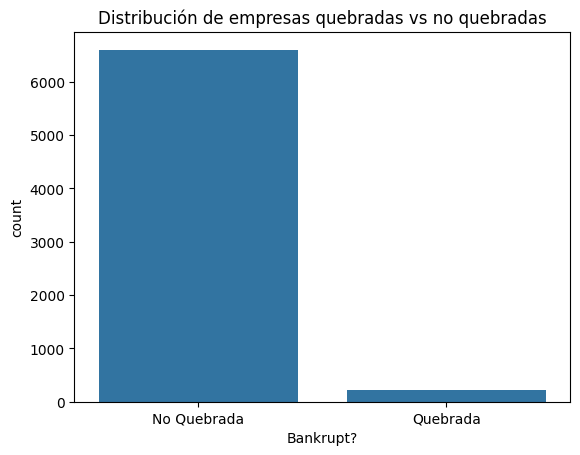

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

In [5]:
# Ver distribución de la clase 'Bankrupt?'
sns.countplot(data=df, x='Bankrupt?')
plt.title("Distribución de empresas quebradas vs no quebradas")
plt.xticks([0, 1], ["No Quebrada", "Quebrada"])
plt.show()

# Ver proporción
df['Bankrupt?'].value_counts(normalize=True)

In [6]:
# Verificar nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# Verificar duplicados
print("Duplicados:", df.duplicated().sum())

Valores nulos por columna:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64
Duplicados: 0


Top 10 correlaciones con la quiebra:
Net Income to Total Assets                                 0.315457
ROA(A) before interest and % after tax                     0.282941
ROA(B) before interest and depreciation after tax          0.273051
ROA(C) before interest and depreciation before interest    0.260807
Net worth/Assets                                           0.250161
Debt ratio %                                               0.250161
Persistent EPS in the Last Four Seasons                    0.219560
Retained Earnings to Total Assets                          0.217779
Net profit before tax/Paid-in capital                      0.207857
Per Share Net profit before tax (Yuan ¥)                   0.201395
Name: Bankrupt?, dtype: float64


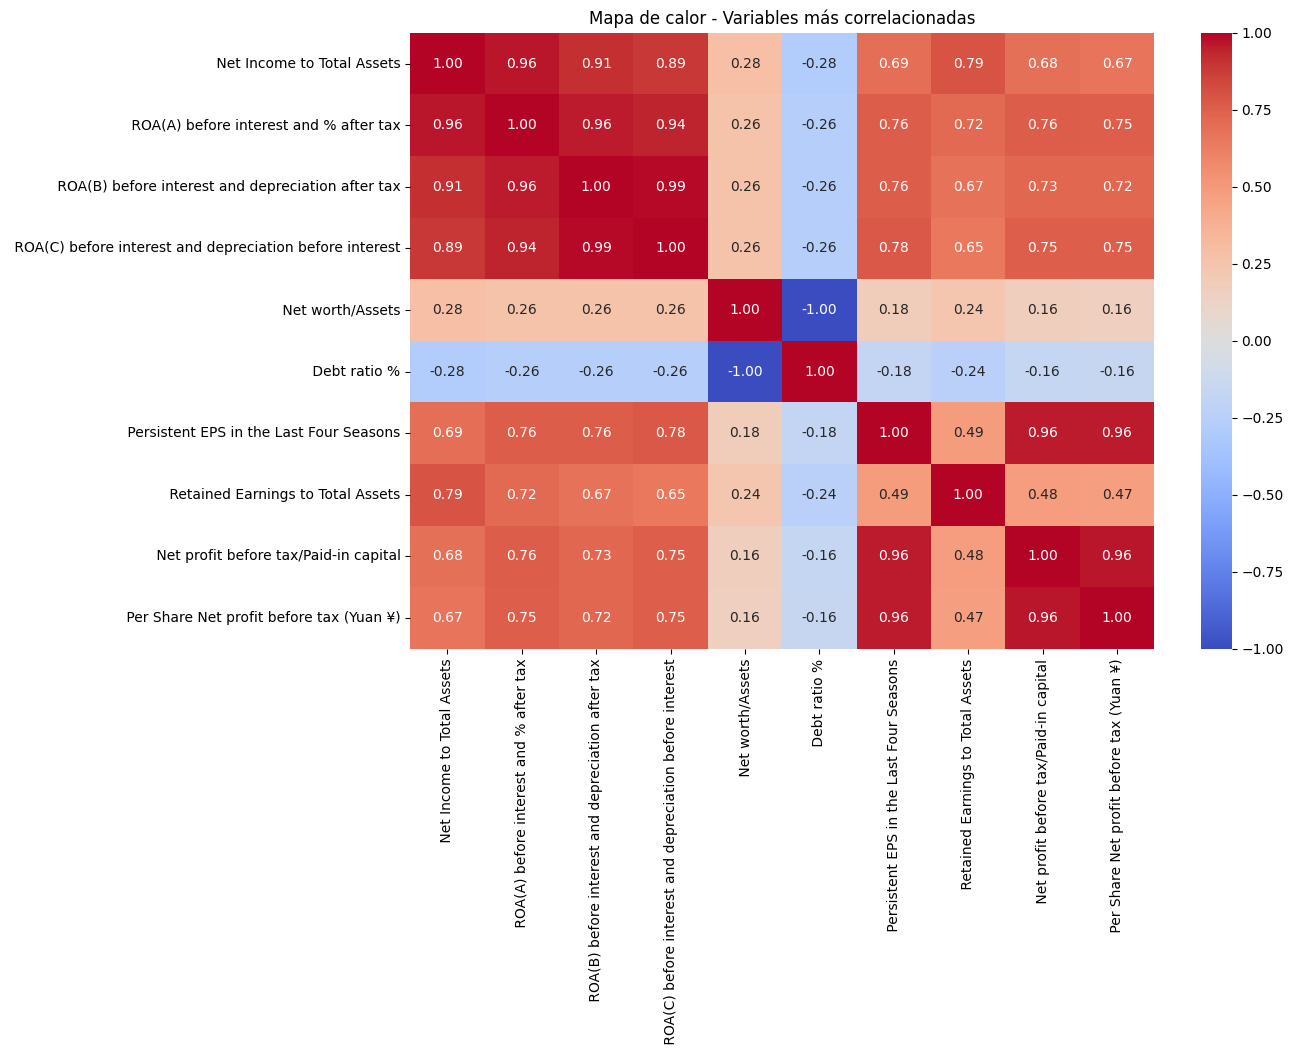

In [7]:
# Calcular correlación con la variable objetivo
corr_target = df.corr(numeric_only=True)['Bankrupt?'].sort_values(ascending=False)

# Mostrar las 10 variables más correlacionadas (positiva o negativamente)
print("Top 10 correlaciones con la quiebra:")
print(corr_target.drop('Bankrupt?').abs().sort_values(ascending=False).head(10))

# Mapa de calor de correlación con las más correlacionadas
top_corr = corr_target.abs().sort_values(ascending=False)[1:11].index
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor - Variables más correlacionadas")
plt.show()

In [8]:
# Limpieza de nombres de columnas: eliminar espacios antes/después
df.columns = df.columns.str.strip()

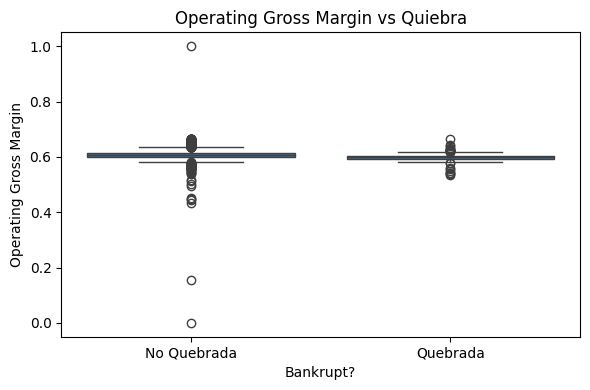

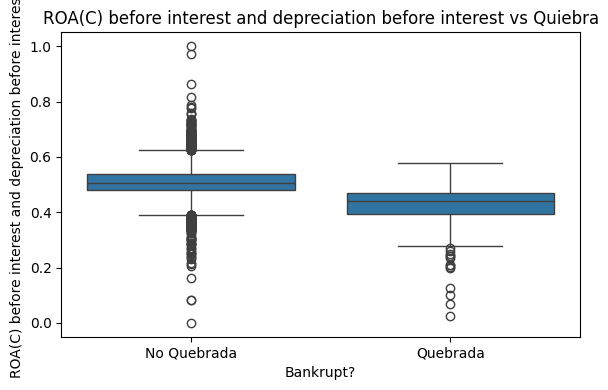

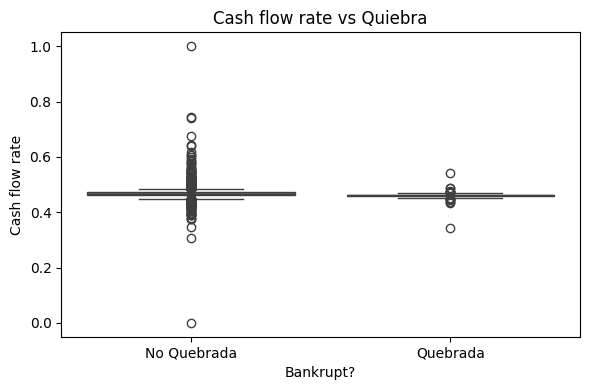

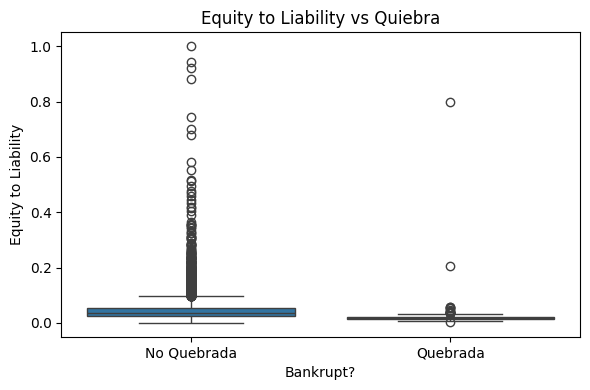

In [9]:
# Lista actualizada de variables tras limpieza de columnas
variables = [
    'Operating Gross Margin',
    'ROA(C) before interest and depreciation before interest',
    'Cash flow rate',
    'Equity to Liability'
]

# Crear los boxplots
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Bankrupt?', y=var, data=df)
    plt.title(f"{var} vs Quiebra")
    plt.xticks([0, 1], ["No Quebrada", "Quebrada"])
    plt.tight_layout()
    plt.show()

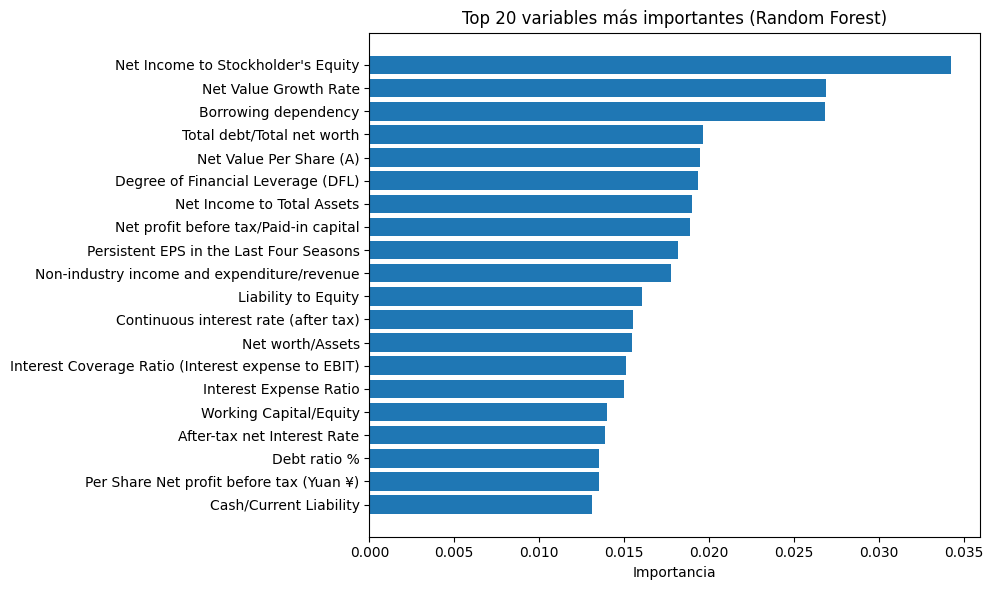

In [10]:
 
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

# 3. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 4. Entrenar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Importancia de variables
importances = model.feature_importances_
sorted_idx = importances.argsort()[::-1]

# 6. Graficar las 20 más importantes
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx[:20]][::-1], importances[sorted_idx[:20]][::-1])
plt.title("Top 20 variables más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

In [11]:
# Cargar el CSV
df = pd.read_csv("data.csv")

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# Separar variable objetivo y variables predictoras
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión global:")
print(accuracy_score(y_test, y_pred))

Matriz de confusión:
[[1976    4]
 [  53   13]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1980
           1       0.76      0.20      0.31        66

    accuracy                           0.97      2046
   macro avg       0.87      0.60      0.65      2046
weighted avg       0.97      0.97      0.96      2046


Precisión global:
0.9721407624633431
